In [3]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from dataset import Dataset

data = Dataset()
data.head()

,Path,Modality,Type,Emotion,Intensity,Statement,Repetition,Actor,Audio
0,data/Actor_19/03-01-02-02-02-01-19.wav,3,1,2,2,2,1,19,"[4.3382965e-07, -5.6459936e-07, 7.628256e-07, ..."
1,data/Actor_19/03-01-05-01-01-01-19.wav,3,1,5,1,1,1,19,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,data/Actor_19/03-01-03-01-02-02-19.wav,3,1,3,1,2,2,19,"[-8.180446e-05, -0.0001263399, -0.00010131867,..."
3,data/Actor_19/03-01-06-01-01-01-19.wav,3,1,6,1,1,1,19,"[7.3140654e-08, -8.6944056e-08, 1.0106942e-07,..."
4,data/Actor_19/03-01-05-02-02-02-19.wav,3,1,5,2,2,2,19,"[-3.7973892e-05, -5.89407e-05, -6.443515e-05, ..."


Text(0, 0.5, 'Number of samples')

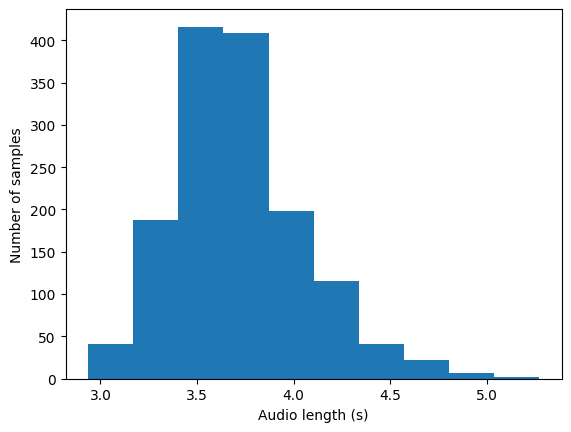

In [13]:
fig,ax = plt.subplots()
audios = data()['Audio'].values
ax.hist([len(audio)/16000 for audio in audios])
ax.set_xlabel('Audio length (s)')
ax.set_ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

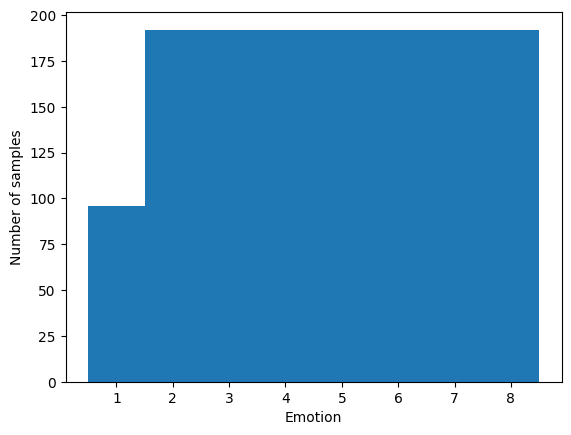

In [11]:
fig,ax = plt.subplots()
labels = data()['Emotion'].values
ax.hist(labels,bins=[i+0.5 for i in range(max(labels)+1)])
ax.set_xlabel('Emotion')
ax.set_ylabel('Number of samples')

Text(0.5, 1.0, 'Audio waveform')

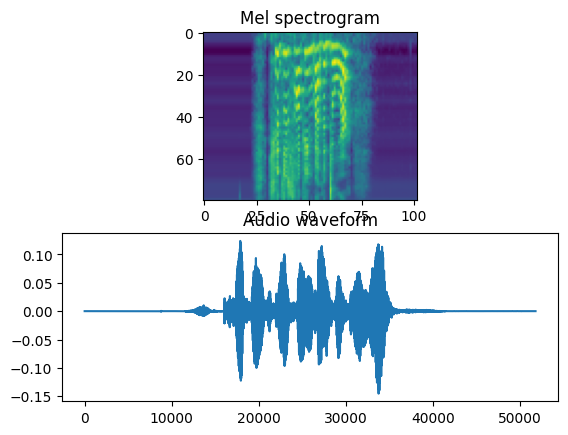

In [28]:
plt.subplot(2,1,1)
audio = np.random.choice(audios)
melspec = np.log(librosa.feature.melspectrogram(y=audio,sr=16000,n_fft=512,n_mels=80)+1e-8)
melspec -= melspec.mean(axis=-1,keepdims=True)
plt.imshow(melspec)
plt.title('Mel spectrogram')
plt.subplot(2,1,2)
plt.plot(np.arange(len(audio)),audio)
plt.title('Audio waveform')